## Objective

#### Your task as a Senior Data Designer is to find what data can be collected about the customers throughout their shopping journey and how it can be used to make their shopping experience feel unique.

## Data collection

In [1]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson
import math

# Feature Selection
from sklearn.feature_selection import RFECV

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split,TimeSeriesSplit

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor, 
    AdaBoostRegressor, RandomForestRegressor, 
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

# ML classifiers
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier, 
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier
    )
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

#Clustering algorithm
from sklearn.cluster import KMeans

# Fine-tuning 
# import optuna

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\Data Science\GlobalLogic\dohtem_ecommerce_customers.csv")

## Exploratory Data Analysis

- We have total 19 attributes and 5630 samples to work with.
- There are missing values
- We have bunch of Continuous and Categorical features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [6]:
df_copy = df.copy() # Creating a copy of the original dataset
df_copy = df_copy.drop('CustomerID', axis = 1) # Removing 'Id' column

In [7]:
df.MaritalStatus.value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [16]:
pd.pivot_table(data = df, values=None,
    index=df['MaritalStatus'],
    columns=df['NumberOfDeviceRegistered'],
    aggfunc = 'mean',
    fill_value=None,
    dropna = True)

CashbackAmount                                      \
NumberOfDeviceRegistered              1           2           3           4   
MaritalStatus                                                                 
Divorced                     149.520000  172.558140  173.080000  188.539945   
Married                      160.646667  184.006135  166.625422  185.510073   
Single                       167.283333  188.400000  159.833645  174.963777   

                                                     Churn            \
NumberOfDeviceRegistered           5           6         1         2   
MaritalStatus                                                          
Divorced                  192.161290  205.722222  0.040000  0.046512   
Married                   190.590308  190.662921  0.033333  0.036810   
Single                    175.660066  179.781818  0.266667  0.257143   

                                              ...     Tenure             \
NumberOfDeviceRegistered         3         4  ...          3          4   
MaritalStatus                                 ...                         
Divorced                  0.134545  0.146006  ...  11.384000  11.254902   
Married                   0.111361  0.116841  ...  10.986386  11.171759   
Single                    0.220561  0.250970  ...   8.629474   8.810992   

                                              WarehouseToHome             \
NumberOfDeviceRegistered          5         6               1          2   
MaritalStatus                                                              
Divorced                  10.008197  6.666667       14.545455  15.790698   
Married                   10.392377  8.943820       15.125000  16.209877   
Single                     8.413559  8.181818       16.148148  16.614286   

                                                                      
NumberOfDeviceRegistered          3          4          5          6  
MaritalStatus                                                         
Divorced                  15.792157  15.810198  14.276423  13.666667  
Married                   15.353511  16.110744  16.102222  16.528090  
Single                    14.778013  15.137652  15.739130  18.072727  

[3 rows x 84 columns]

In [ ]:
df.pivot_table(values=None,
    index=df['MaritalStatus'],
    columns=df['NumberOfDeviceRegistered'],
    aggfunc = 'mean')

## Meaning of features

By inspecting the columns and their unique values, a general understanding about the features can be build. The features can also be clustered into different categories:

### Classification labels

1. Churn — Whether the customer churned or not (Yes or No)

### Customer account information

1. Tenure — Number of months the customer has stayed with the company
2. PreferredLoginDevice — Mobile Phone, Phone, Computer
3. PreferredPaymentMode — The customer’s payment method (Debit Card, UPI, CC, Cash on Delivery, E wallet, COD, Credit Card)
4. PreferedOrderCat: Laptop & Accessory, Mobile, Mobile Phone, Others, Fashion, Grocery

### Customers demographic info

1. customerID — Customer ID
2. Gender — Whether the customer is a male or a female
3. MaritalStatus — Single, Divorced, Married



In [741]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## Data Preprocessing for EDA

In [ ]:
# Defining seed and the template for plots
seed = 42
plotly_template = 'simple_white'

In [ ]:
def dataframe_description(df):
    """
    This function prints some basic info on the dataset.
    """
    categorical_features = []
    continuous_features = []
    binary_features = []
    
    for col in df.columns:
        if df[col].dtype == object:
            categorical_features.append(col)
        else:
            if df[col].nunique() <= 2:
                binary_features.append(col)
            else:
                continuous_features.append(col)
    
    print("\n{} shape: {}".format(type(df).__name__, df.shape))
    print("\n{:,.0f} samples".format(df.shape[0]))
    print("\n{:,.0f} attributes".format(df.shape[1]))
    print(f'\nMissing Data: \n')
    print(df.isnull().sum())
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData types: \n')
    print(df.dtypes)
    print(f'\nCategorical features: \n')
    if len(categorical_features) == 0:
        print('No Categorical Features')
    else:
        for feature in categorical_features:
            print(feature)
    print(f'\nContinuous features: \n')
    if len(continuous_features) == 0:
        print('No Continuous Features')
    else:
        for feature in continuous_features:
            print(feature)
    print(f'\nBinary features: \n')
    if len(binary_features) == 0:
        print('No Binary Features')
    else:
        for feature in binary_features:
            print(feature)
    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [ ]:
def plot_correlation(df):
    '''
    This function is resposible to plot a correlation map among features in the dataset
    '''
    corr = np.round(df.corr(), 2)
    mask = np.triu(np.ones_like(corr, dtype = bool))
    c_mask = np.where(~mask, corr, 100)

    c = []
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x != 100])
    
    fig = ff.create_annotated_heatmap(z=c[::-1],
                                      x=corr.index.tolist()[:-1],
                                      y=corr.columns.tolist()[1:][::-1],
                                      colorscale = 'bluyl')

    fig.update_layout(title = {'text': '<b>Feature Correlation <br> <sup>Heatmap</sup></b>'},
                      height = 650, width = 650,
                      margin = dict(t=210, l = 80),
                      template = 'simple_white',
                      yaxis = dict(autorange = 'reversed'))

    fig.add_trace(go.Heatmap(z = c[::-1],
                             colorscale = 'bluyl',
                             showscale = True,
                             visible = False))
    fig.data[1].visible = True

    fig.show()

In [ ]:
def describe(df):
    '''
    This function plots a table containing Descriptive Statistics of the Dataframe
    '''
    mean_features = df.mean().round(2).apply(lambda x: "{:,.2f}".format(x)) 
    std_features = df.std().round(2).apply(lambda x: "{:,.2f}".format(x)) 
    q1 = df.quantile(0.25).round(2).apply(lambda x: "{:,.2f}".format(x))
    median = df.quantile(0.5).round(2).apply(lambda x: "{:,.2f}".format(x))
    q3 = df.quantile(0.75).round(2).apply(lambda x: "{:,.2f}".format(x))


    # Generating new Dataframe
    describe_df = pd.DataFrame({'Feature Name': mean_features.index,
                                'Mean': mean_features.values,
                                'Standard Deviation': std_features.values,
                                '25%': q1.values,
                                'Median': median.values,
                                '75%': q3.values})

    # Generating a Table w/ Pyplot
    fig = go.Figure(data = [go.Table(header=dict(values=list(describe_df.columns),
                                                 align = 'center',
                                                 fill_color = 'midnightblue',
                                               font=dict(color = 'white', size = 18)),
                                     cells=dict(values=[describe_df['Feature Name'],
                                                        describe_df['Mean'],
                                                        describe_df['Standard Deviation'],
                                                       describe_df['25%'],
                                                       describe_df['Median'],
                                                       describe_df['75%']],
                                                fill_color = 'gainsboro',
                                                align = 'center'))
                           ])

    fig.update_layout(title = {'text': f'<b>Descriptive Statistics of the Dataframe<br><sup> (Mean, Standard Deviation, 25%, Median, and 75%)</sup></b>'},
                      template = plotly_template,
                      height = 700, width = 950,
                      margin = dict(t = 100))

    fig.show()

In [ ]:
def plot_distplot(df, x):  
    '''
    This function creates a distribution plot for continuous variables
    '''
    
    feature = df[x]

    fig = ff.create_distplot([feature], [x], show_hist=False)

    fig.update_layout(
        title={'text': f'<b>Distplot <br> <sup>{x}</sup></b>',
               'xanchor': 'left',
               'x': 0.05},
        height=600,
        width=1000,
        margin=dict(t=100),
        template= plotly_template,
        showlegend=True
    )

    fig.show()

In [ ]:
def plot_histogram_matrix(df):
    
    '''
    This function identifies all continuous features within the dataset and plots
    a matrix of histograms for each attribute
    '''
    
    continuous_features = []
    for feat in df.columns:
        if df[feat].nunique() > 2:
            continuous_features.append(feat)
    num_cols = 2
    num_rows = (len(continuous_features) + 1) // num_cols

    fig = make_subplots(rows=num_rows, cols=num_cols)

    for i, feature in enumerate(continuous_features):
        row = i // num_cols + 1
        col = i % num_cols + 1

        fig.add_trace(
            go.Histogram(
                x=df[feature],
                name=feature
            ),
            row=row,
            col=col
        )

        fig.update_xaxes(title_text=feature, row=row, col=col)
        fig.update_yaxes(title_text='Frequency', row=row, col=col)
        fig.update_layout(
            title=f'<b>Histogram Matrix<br> <sup> Continuous Features</sup></b>',
            showlegend=False
        )

    fig.update_layout(
        height=350 * num_rows,
        width=1000,
        margin=dict(t=100, l=80),
        template= plotly_template
    )

    fig.show()

In [ ]:
def plot_boxplot_matrix(df):
    
    '''
    This function identifies all continuous features within the dataset and plots
    a matrix of boxplots for each attribute
    '''
    
    continuous_features = []
    for feat in df.columns:
        if df[feat].nunique() > 2:
            continuous_features.append(feat)
    
    num_cols = 2
    num_rows = (len(continuous_features) + 1) // num_cols


    fig = make_subplots(rows=num_rows, cols=num_cols)


    for i, feature in enumerate(continuous_features):
        row = i // num_cols + 1
        col = i % num_cols + 1

        fig.add_trace(
            go.Box(
                x=df[feature],
                name = ' '
            ),
            row=row,
            col=col
        )

        fig.update_yaxes(title_text = ' ', row=row, col=col)
        fig.update_xaxes(title_text= feature, row=row, col=col)
        fig.update_layout(
            title=f'<b>Boxplot Matrix<br> <sup> Continuous Features</sup></b>',
            showlegend=False,
            yaxis=dict(
            tickangle=-90  
        )
        )

    fig.update_layout(
        height=350 * num_rows,
        width=1000,
        margin=dict(t=100, l=80),
        template= plotly_template
    )


    fig.show()


In [ ]:
def scatterplot(df, x, y):
    '''
    This function takes a dataframe and X and y axes to plot a scatterplot
    '''

    color_dict = {
        0: 'orange',
        1: 'blue',
        2: 'green',
        3: 'red',
        4: 'black',
        5: 'purple',
        6: 'pink',
        7: 'brown',
        8: 'teal',
        9: 'magenta',
        10: 'cyan',
        11: 'olive',
        12: 'navy',
        13: 'indigo',
        14: 'maroon',
        15: 'turquoise',
        16: 'silver',
        17: 'gold'
    }
    
    color_index = random.choice(list(color_dict.keys()))
    color = color_dict[color_index]

    fig = px.scatter(df, y=y, x=x)
    fig.update_traces(marker=dict(size=10, color=color))
    fig.update_layout(
        title={'text': f'<b>Scatterplot <br> <sup>{x} x {y}</sup></b>'},
        height=750,
        width=850,
        margin=dict(t=80, l=80),
        template= plotly_template
    )
    fig.show()

In [ ]:
def clustered_scatterplot(df, y, x, cluster):
    '''
    This function takes a dataframe, x, and y axes to plot a scatterplot colored accordingly to clusters
    It also prints a count of values for each cluster
    '''
    fig = px.scatter(df,
                     y = y,
                     x = x,
                     color = cluster, symbol = cluster)

    fig.update_traces(marker = dict(size = 10))

    fig.update(layout_coloraxis_showscale=False)

    fig.update_layout(title = {'text': f'<b>Clustered Scatterplot <br> <sup> {y} x {x} </sup></b>',
                              'xanchor': 'left',
                              'x': 0.05},
                     height = 600, width = 700,
                     margin = dict(t=100),
                     template = plotly_template,
                     showlegend = True)

    fig.show()

    print('Cluster Count:')
    print(f'{df[cluster].value_counts()}')

In [ ]:
def barplot(df, feat):    
    
    '''
    This function is supposed to organize the n top value counts of any attribute and plot a Barplot
    '''
    
    counts = df[feat].value_counts()
    fig = px.bar(y=counts.values, 
                 x=counts.index, 
                 color = counts.index,
                 text=counts.values)

    fig.update_layout(title=f'<b>Frequency of values in {feat}<br> <sup> Barplot</sup></b>',
                      xaxis=dict(title=f'{feat}'),
                      yaxis=dict(title='Count'),
                      legend=dict(title=f'{feat}'),
                      showlegend=True,
                      height=600,
                      width=1000,
                      margin=dict(t=100, l=80),
                      template= plotly_template)
    fig.show()

In [ ]:
def shapiro_wilk_test(df):
    '''
    This function performs a Shapiro-Wilk test to check if the data is normally distributed or not, as well as skewness
    '''
    print(f'\033[1mShapiro-Wilk Test & Skewness:\033[0m')
    print('\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  \n')

    numeric_columns = df.select_dtypes(include=['float', 'int']).columns

    for feature in numeric_columns:
        stats, p_value = shapiro(df[feature])

        if p_value < 0.05:
            text = f'{feature} Does Not Seem to be Normally Distributed'
        else:
            text = f'{feature} Seems to be Normally Distributed'

        print(f'{feature}')
        print(f'\n  Shapiro-Wilk Statistic: {stats:.2f}')
        print(f'\n  Shapiro-Wilk P-value: {p_value}')
        print(f'\n  Skewness: {np.round(skew(df[feature]), 2)}')
        print(f'\n  Conclusion: {text}')
        print('\n===============================================================================================')

    print('\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  \n')
    print(f'\033[1mEnd of Shapiro-Wilk Test\033[0m')

In [ ]:
def boxplot(df, y, x, color):    
    '''
    This function plots a Y and X boxplot
    '''
    fig = px.box(df, y= y , x = x, color= color)

    fig.update_layout(title=f'<b>Boxplot<br> <sup> {y} by {x}</sup></b>',
                      showlegend=False,
                      yaxis=dict(tickangle= -45),
                      height=600,
                      width=1000,
                      margin=dict(t=100, l=80),
                      template= plotly_template)

    fig.show()

In [ ]:
def pred_vs_true_plot(y_true, y_pred):
    '''
    This function takes values for y_true and y_val, and plots a scatterplot along with a line of best fit
    '''

    slope, intercept = np.polyfit(y_true, y_pred, 1)
    fit_line = slope * y_true + intercept

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode='markers', name='Data Points'))
    fig.add_trace(go.Scatter(x=y_true, y=fit_line, mode='lines', line=dict(color='red'), name='Fit-line'))
    fig.update_traces(marker=dict(size=10, color='blue'))
    fig.update_layout(
        title={'text': f'<b>True x Predicted <br> <sup>Scatterplot</sup></b>'},
        xaxis=dict(title='True Salaries'), 
        yaxis=dict(title='Predicted Salaries'),
        height=750,
        width=850,
        margin=dict(t=250, l=80),
        template= plotly_template,
    )
    fig.show()

In [ ]:
def three_axes_scatterplot(df, x, y, z):   
    
    '''
    This function takes a dataframe and different attributes to build a 3D scatterplot
    
    '''
    
    scatterplot = go.Scatter3d(
        x= df[x],
        y= df[y],
        z= df[z],  
        mode='markers')

    fig = go.Figure(data=scatterplot)
    fig.update_layout(
        title={'text': f'<b>3D Scatterplot <br> <sup>{x} x {y} x {z}</sup></b>',
               'xanchor': 'left',
               'x': 0.05},
        height=600,
        width=700,
        margin=dict(t=100),
        template= plotly_template,
        showlegend=True
    )

    
    fig.show()

In [ ]:
def violin_boxplot(df, y, x, color):    
    '''
    This function plots a Y and X ridgeline plot
    '''
    
    fig = px.violin(df, y=y, x=x, color=color, box=True, points= 'all')

    fig.update_layout(title=f'<b>Violin Boxplot<br> <sup>{x} by {y}</sup></b>',
                      showlegend=False,
                      yaxis=dict(tickangle=-45),
                      height=600,
                      width=1000,
                      margin=dict(t=100, l=80),
                      template= plotly_template)

    fig.show()

In [ ]:
def individual_boxplot(df, x):    
    fig = px.box(df, x = x)

    fig.update_layout(title=f'<b>Boxplot<br> <sup> {x}</sup></b>',
                      showlegend=False,
                      yaxis=dict(tickangle= -45),
                      height=400,
                      width=1000,
                      margin=dict(t=100, l=80),
                      template= plotly_template)

    fig.show()

In [ ]:
def elbow_curve(wss):    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = list(range(1,10)),
                            y = wss,
                            mode = 'lines+markers',
                            marker = dict(color = 'midnightblue'),
                            name = 'WSS'))

    
    fig.update_layout(title = {'text': '<b>Elbow Curve Plot <br> <sup>Within-Cluster Sum of Squares</sup></b>'},
                     height = 400, width = 950,
                     xaxis_title = 'Number of Clusters',
                     yaxis_title = 'Within-Cluster Sum of Squares (WSS)',
                     margin = dict(t=80),
                     template = plotly_template)

    fig.show()

In [ ]:
def split_train_test(df, test_size, seed):
    
    '''
    This function splits a dataframe for training and testing according to test_size
    '''
    
    train, test = train_test_split(df, test_size = test_size, shuffle = True, random_state = seed) # Splitting data

    print(f'\n Train shape: {train.shape}\n')
    print(f'\n {len(train)} Samples \n')
    print(f'\n {len(train.columns)} Attributes \n')
    display(train.head(10))
    print('\n' * 2)

    print(f'\n Test shape: {test.shape:}\n')
    print(f'\n {len(test)} Samples \n')
    print(f'\n {len(test.columns)} Attributes \n')
    display(test.head(10))
    
    return train, test

In [ ]:
def X_y_split(df, target_variable):
    
    '''
    This function takes a dataframe and a target variable to create an X (predictors) dataframe and a y Series
    '''
    
    X, y = df.drop([target_variable], axis = 1), df[target_variable] 

    #Printing info on X and y
    print(f'\nX shape: {X.shape}\n')
    print(f'\n{len(X)} Samples \n')
    print(f'\n{len(X.columns)} Attributes \n')
    display(X.head(10))
    print('\n')
    print(f'\ny shape: {y.shape}\n')
    print(f'\n{len(y)} Samples \n')
    display(y.head(10))
    
    return X, y

In [ ]:
def quadratic_weighted_kappa(y_true, y_pred):
    '''
    This function returns the evaluation metric of this competition
    '''
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

In [638]:
df.PreferredPaymentMode.value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [639]:
df.PreferredPaymentMode=df.PreferredPaymentMode.replace({'Cash on Delivery':'COD',
                                                        'Credit Card':'CC'})

In [640]:
df.PreferredPaymentMode.value_counts(normalize=True)

Debit Card    0.411012
CC            0.315098
E wallet      0.109059
COD           0.091297
UPI           0.073535
Name: PreferredPaymentMode, dtype: float64

In [641]:
df.PreferredLoginDevice.value_counts(normalize=True)

Mobile Phone    0.491119
Computer        0.290231
Phone           0.218650
Name: PreferredLoginDevice, dtype: float64

In [642]:
df.PreferredLoginDevice=df.PreferredLoginDevice.replace({'Mobile Phone':'Phone'})

In [643]:
df.PreferredLoginDevice.value_counts()

Phone       3996
Computer    1634
Name: PreferredLoginDevice, dtype: int64

In [644]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [645]:
# DaySinceLastOrder replace by max value or 99999
# OrderCount replaced by zero
# CouponUsed replaced by zero
# OrderAmountHikeFromlastYear replaced by zero
# HourSpendOnApp replaced by zero
# WarehouseToHome replace by mean or median
# Tenure 

## Univariate Analysis

In [646]:
(df.Churn.value_counts(normalize=True)).round(2)

0    0.83
1    0.17
Name: Churn, dtype: float64

In [647]:
# df.describe()

In [648]:
# sns.histplot(x="Tenure", data=df)
# plt.show()

In [649]:
# df.CityTier.value_counts().plot(kind='bar')
# plt.show()

In [650]:
# df.PreferredPaymentMode.value_counts().plot(kind='bar')
# plt.show()

In [651]:
# df.Gender.value_counts().plot(kind='bar')
# plt.show()

In [652]:
# df.HourSpendOnApp.value_counts().plot(kind='bar')
# plt.show()

In [653]:
# df.NumberOfDeviceRegistered.value_counts().plot(kind='bar')
# plt.show()

In [654]:
# df.PreferedOrderCat.value_counts().plot(kind='bar')
# plt.show()

In [655]:
# df.SatisfactionScore.value_counts().plot(kind='bar')
# plt.show()

In [656]:
# df.NumberOfAddress.value_counts().plot(kind='bar')
# plt.show()

## Bivariate Analysis

In [660]:
df.drop('CustomerID', axis=1, inplace= True)

In [661]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


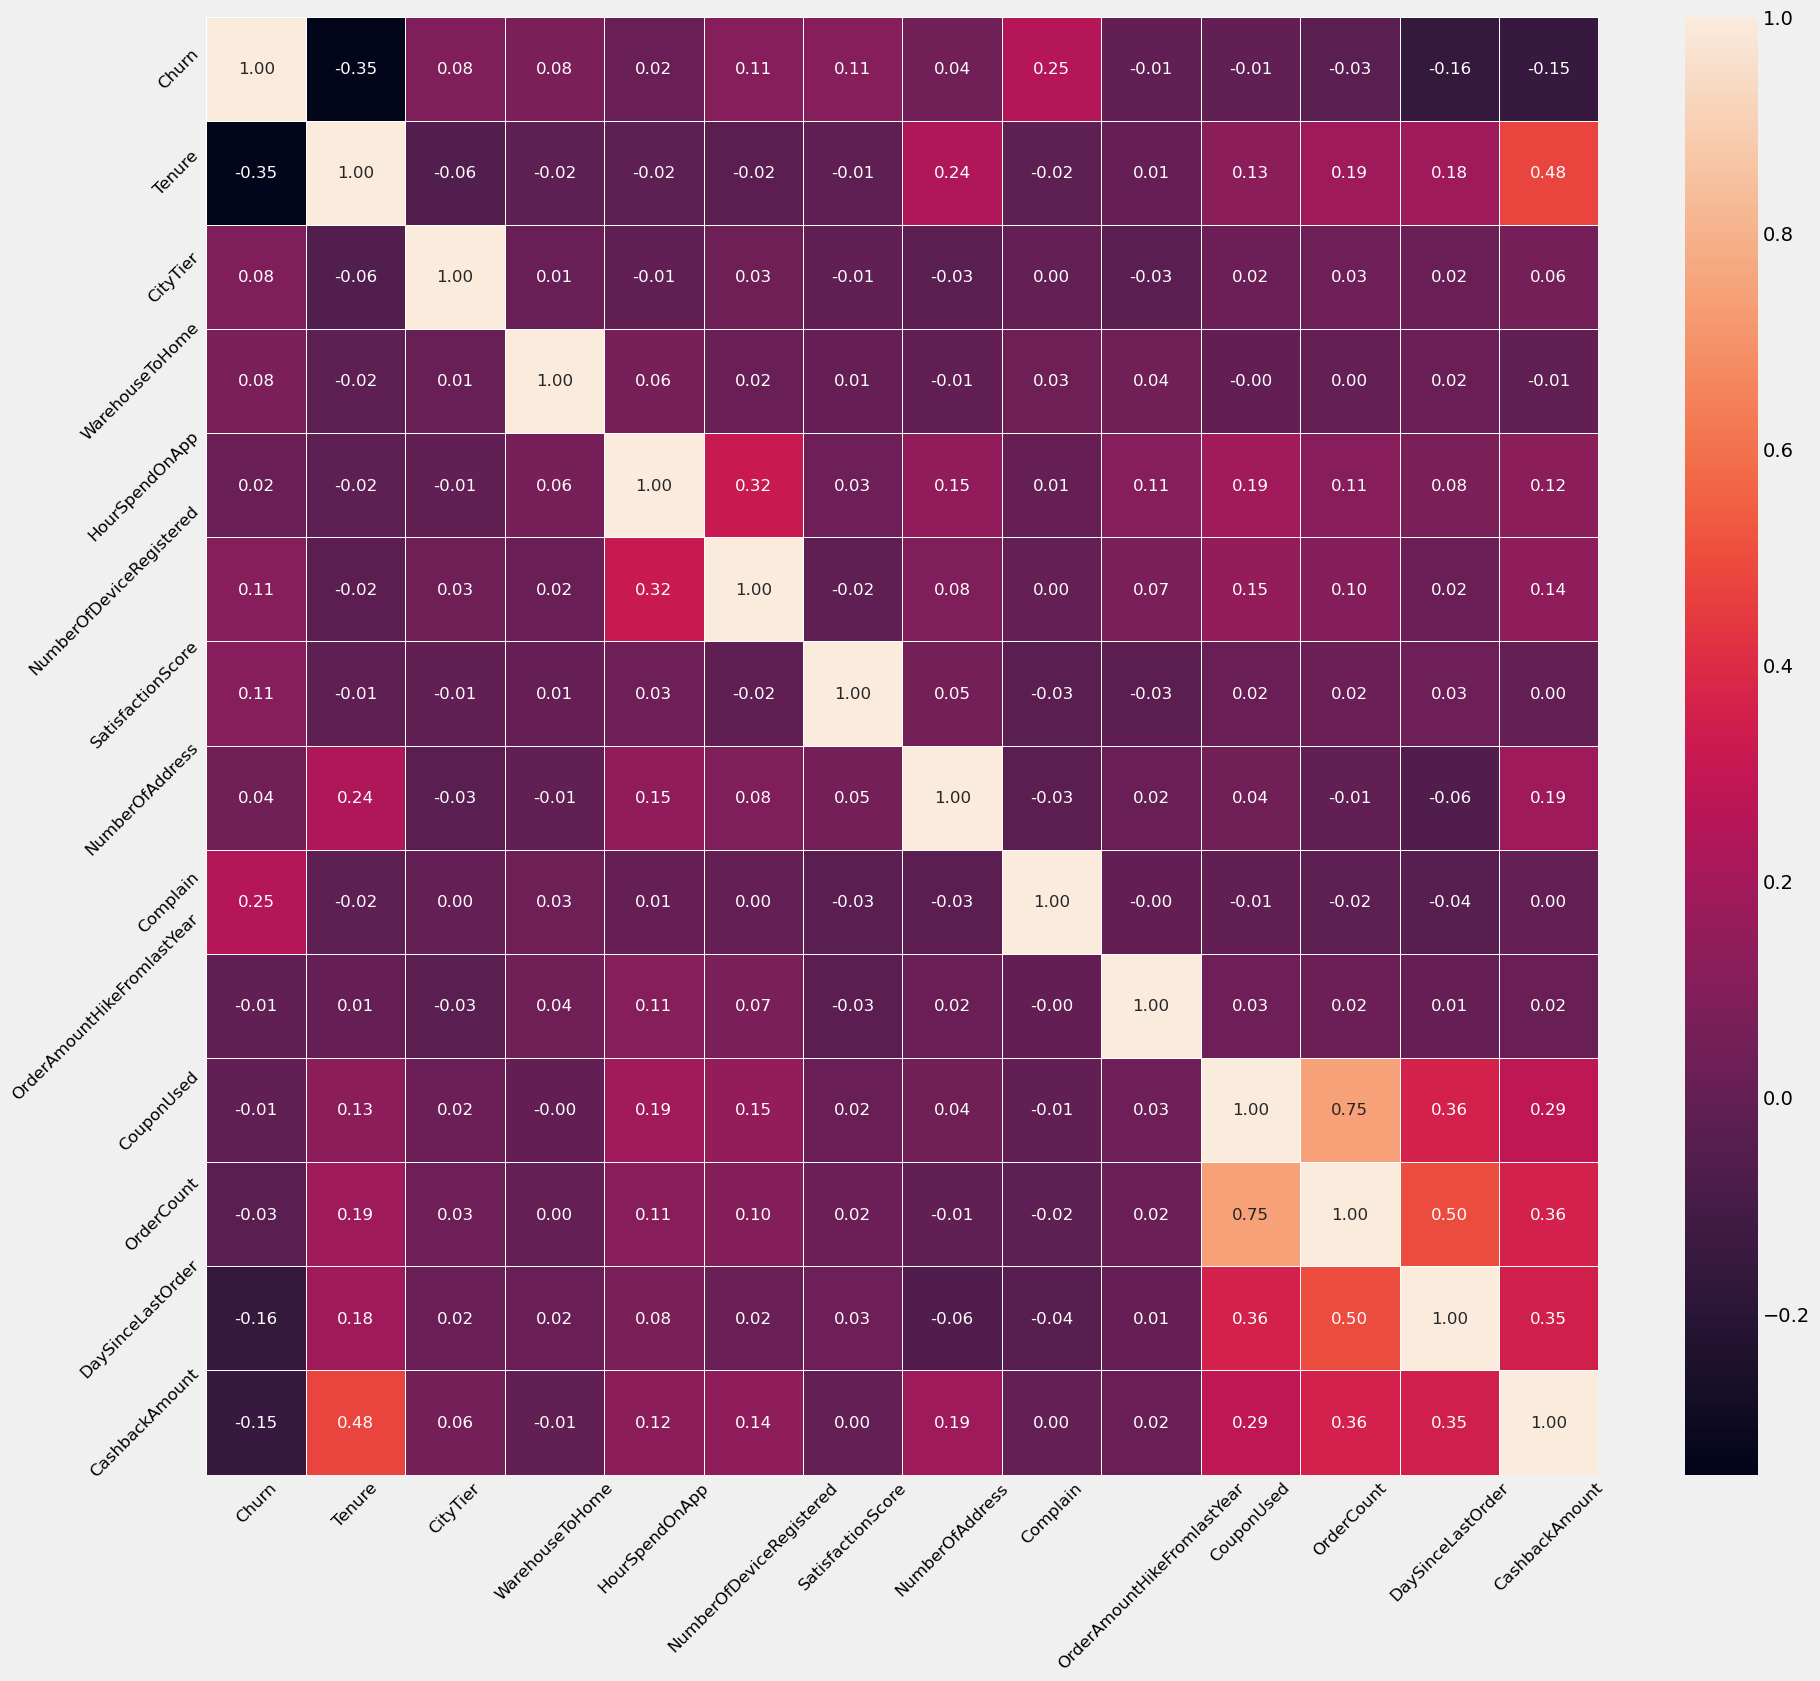

In [662]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),linewidth=0.6,annot=True,fmt=".2f",annot_kws={'fontsize':12, "fontweight":15})
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.show()

In [663]:
pd.crosstab(df.Churn, df.NumberOfDeviceRegistered)

NumberOfDeviceRegistered,1,2,3,4,5,6
Churn,,,,,,
0,213,250,1445,1985,683,106
1,22,26,254,392,198,56


In [664]:
pd.crosstab(df.Churn, df.CityTier)

CityTier,1,2,3
Churn,,,
0,3134,194,1354
1,532,48,368


In [665]:
pd.crosstab(df.Churn, df.Complain)

Complain,0,1
Churn,,
0,3586,1096
1,440,508


In [666]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
integer_columns = df.select_dtypes(include=['int']).columns.tolist()
float_columns = df.select_dtypes(include=['float']).columns.tolist()

In [667]:
# Create a function to generate boxplots.
plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):
    
    rows = 5
    columns = 3
    plt.figure(figsize=(20, 35))
    
    for i, j in enumerate(y):
        plt.subplot(rows, columns, i+1 )
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

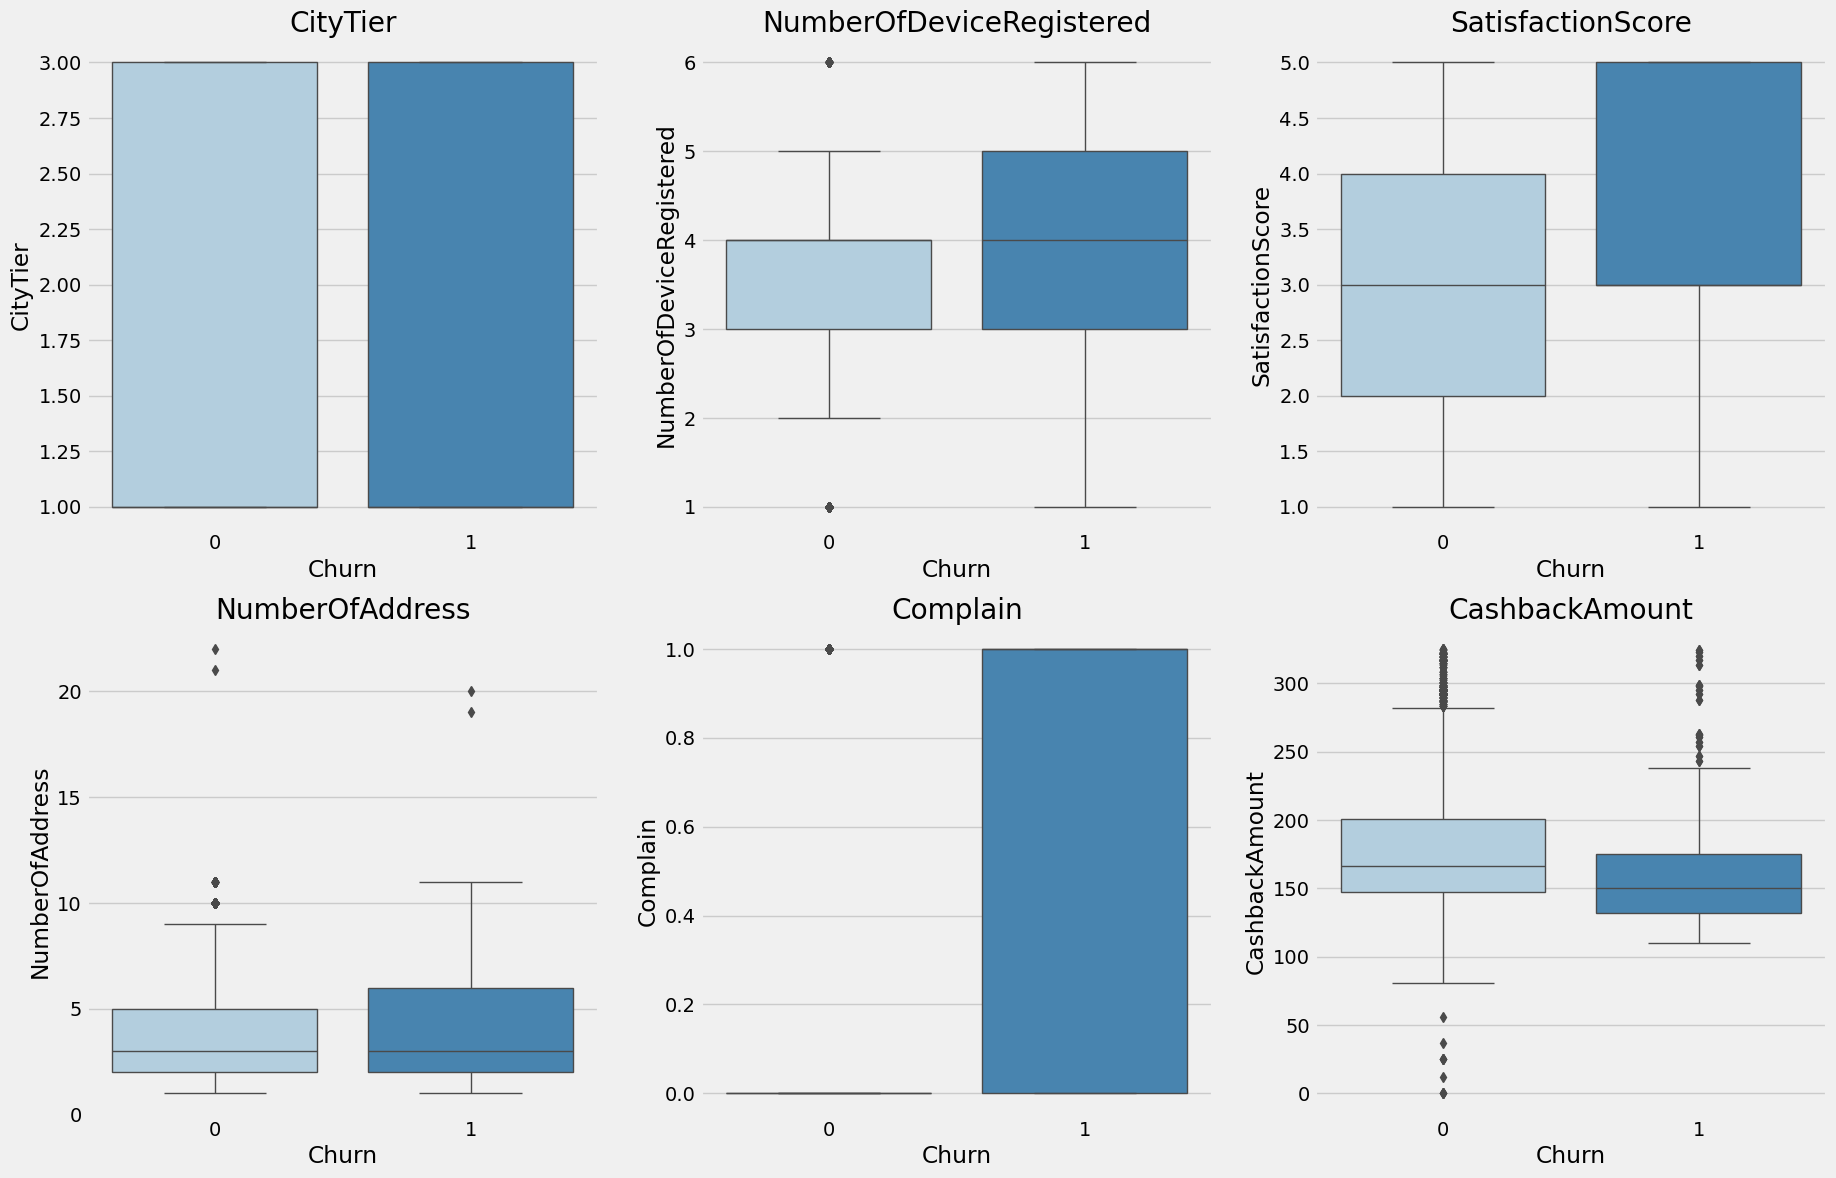

In [668]:
boxplot('Churn', [
 'CityTier',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'CashbackAmount'], df)

In [669]:
# Create a function to generate countplots:
def countplot(x, y, df):
    
    rows = 5
    columns = 3
    
    plt.figure(figsize=(20, 35))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

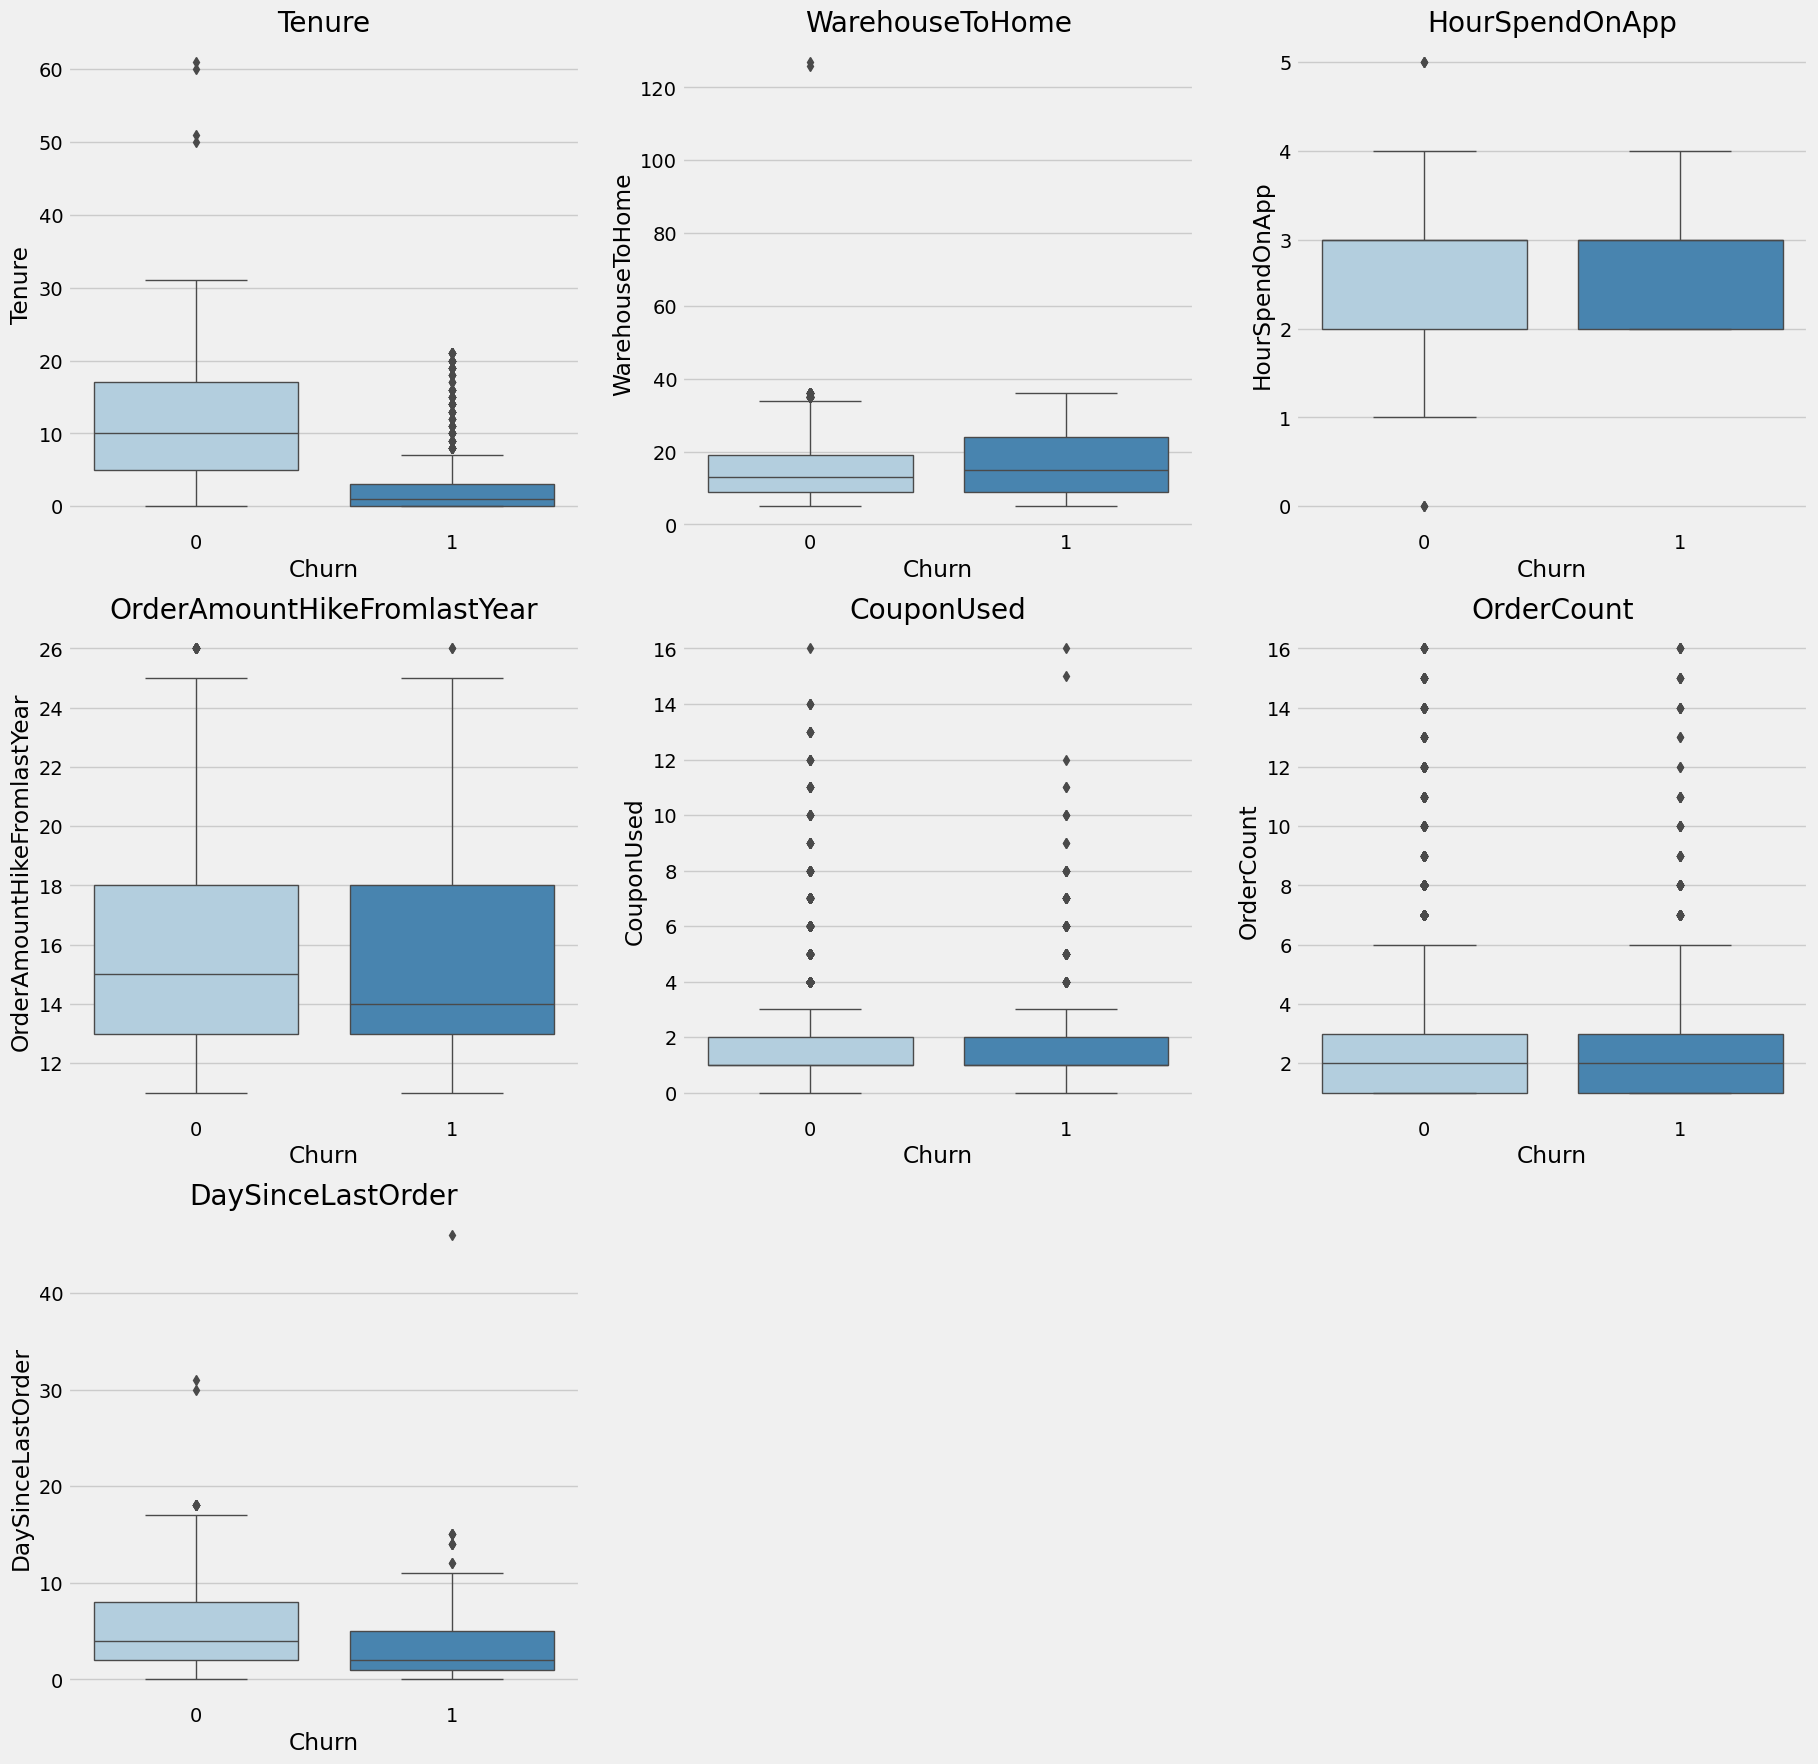

In [670]:
boxplot('Churn', ['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder'], df)

In [671]:
categorical_columns

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [672]:
# Create a function to generate countplots:
def countplot(x, y, df):
    
    rows = 5
    columns = 3
    
    plt.figure(figsize=(20, 15))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        plt.xticks(rotation = 90)
#         plt.xticks(rotation=45)
        
    return plt.show()

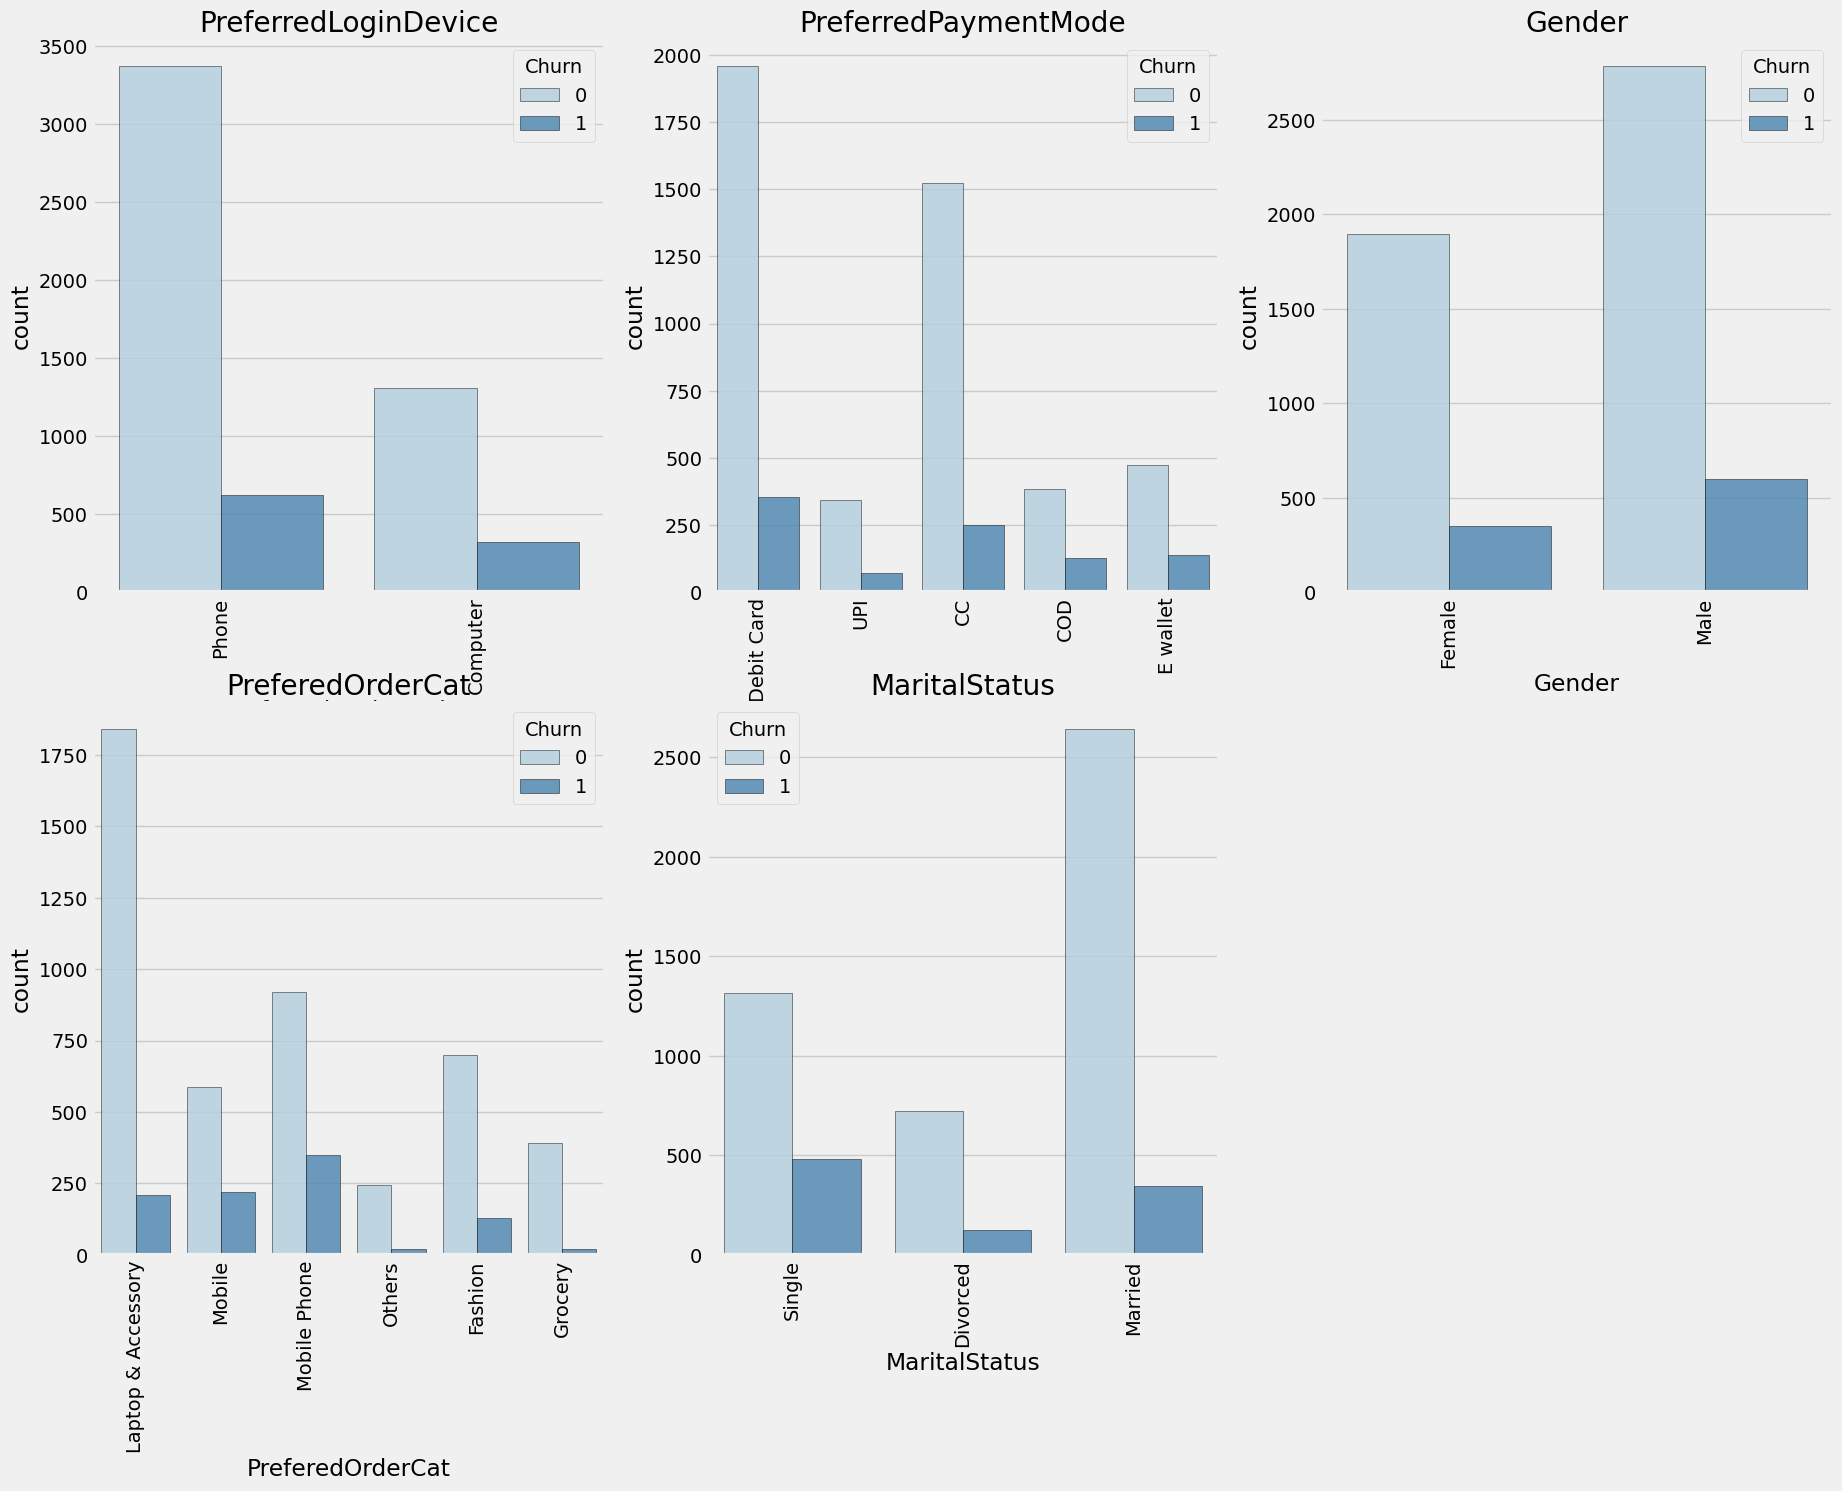

In [673]:
countplot('Churn', ['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus'], df)

## Insights from Univariate analysis

1. Data is imbalanced with 83% non churners and 17% churners
2. Highest orders placed under Laptop and Accessorys and next is under Phones, Fashion catagories
3. 

## Insights from Bivariate analysis

1. Lesser the Tenure more chances that customer will Churn
2. If you give more Cashback amount, customer are like to be in the longer tenure
3. CityTier 1 has good customer relationship
4. If NumberOfDeviceRegistered is more than 3, they are likely to become good customer and data says if they registered 4  devices, it most of the churn customers among total churners
5. If customer registered complaints, They are highly to turn churn. There is directly proportional relationship between Churn vs complaints
6. Good customers are those use phone more than computers
7. Most of the good customer use Debit Card followed by Credit card amoung other mode of trancsation
8. Male customer are more than Female customers
9. Those who married customers are less likely to churn
10. Order count increase. if coupon usage is more

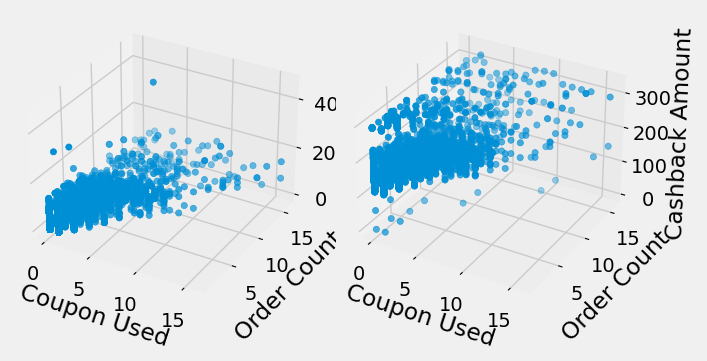

In [674]:
# Create a scatter plot matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a sample dataframe (replace this with your actual data)
data = df.copy()

# Extract data for plotting
coupon_used = data['CouponUsed']
order_count = data['OrderCount']
days_since_last_order = data['DaySinceLastOrder']
cashback_amount = data['CashbackAmount']

# Create 3D scatter plots for different combinations of features
fig = plt.figure(figsize=(10, 4))

# Plot 1: Coupon Used, Order Count, Day Since Last Order
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(coupon_used, order_count, days_since_last_order)
ax1.set_xlabel('Coupon Used')
ax1.set_ylabel('Order Count')
ax1.set_zlabel('Day Since Last Order')

# Plot 2: Coupon Used, Order Count, Cashback Amount
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(coupon_used, order_count, cashback_amount)
ax2.set_xlabel('Coupon Used')
ax2.set_ylabel('Order Count')
ax2.set_zlabel('Cashback Amount')

# # Plot 3: Coupon Used, Day Since Last Order, Cashback Amount
# ax3 = fig.add_subplot(133, projection='3d')
# ax3.scatter(coupon_used, days_since_last_order, cashback_amount)
# ax3.set_xlabel('Coupon Used')
# ax3.set_ylabel('Day Since Last Order')
# ax3.set_zlabel('Cashback Amount')

plt.tight_layout()
plt.show()


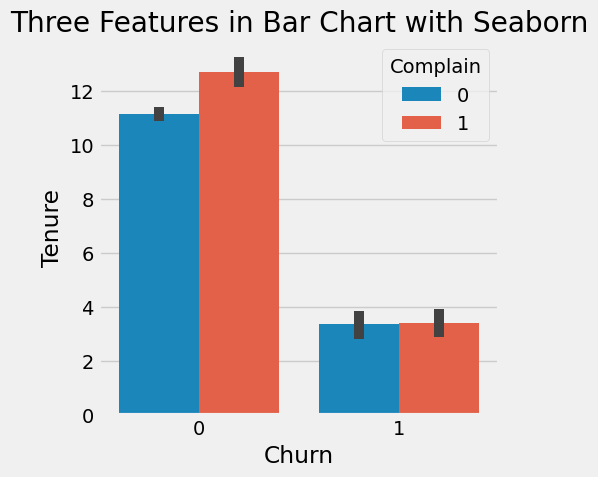

In [675]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Churn', y='Tenure', hue='Complain', data=df)
plt.title('Three Features in Bar Chart with Seaborn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.legend(title='Complain')

# Show plot
plt.tight_layout()
plt.show()

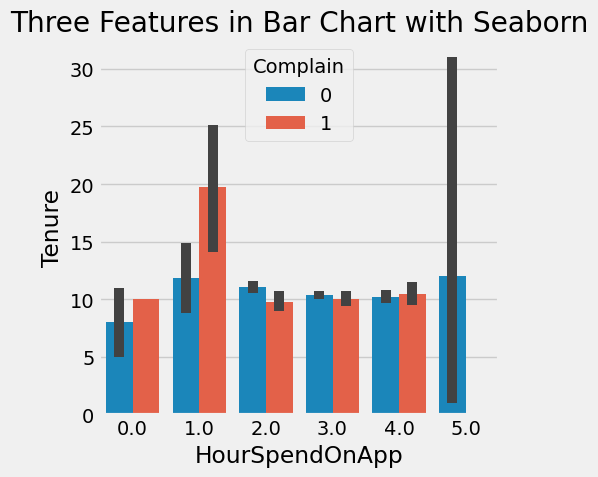

In [676]:
plt.figure(figsize=(5, 5))
sns.barplot(x='HourSpendOnApp', y='Tenure', hue='Complain', data=df)
plt.title('Three Features in Bar Chart with Seaborn')
plt.xlabel('HourSpendOnApp')
plt.ylabel('Tenure')
plt.legend(title='Complain')

# Show plot
plt.tight_layout()
plt.show()

In [677]:
# plt.figure(figsize=(5, 5))
# sns.scatterplot(x='Tenure', y='CashbackAmount', hue= 'CouponUsed' , data=df)
# plt.xlabel('Tenure')
# plt.ylabel('CashbackAmount')


# # Show plot
# plt.tight_layout()
# plt.show()

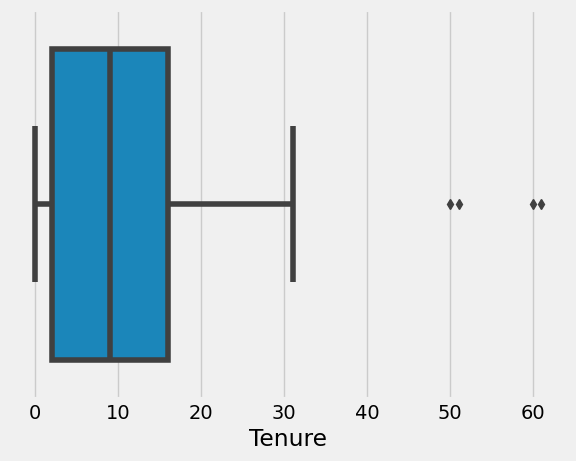

In [680]:
sns.boxplot(x='Tenure', data = df)
plt.show()

In [681]:
def outliers(x):    
    Lower_bound = 0
    Upper_bound = 40
    
    x = np.where((x <= Lower_bound) | (x >= Upper_bound), 11.5, x)
    
    return x


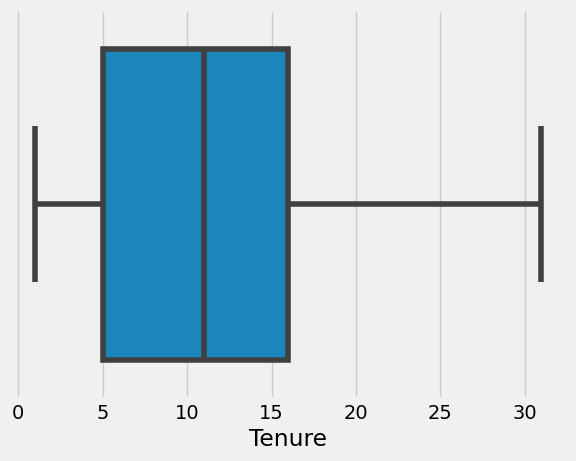

In [682]:
df['Tenure']= df['Tenure'].apply(outliers)
sns.boxplot(x='Tenure', data = df)
plt.show()

### Missing value treatement

In [683]:
# DaySinceLastOrder replace by max value or 99999
# OrderCount replaced by zero
# CouponUsed replaced by zero
# OrderAmountHikeFromlastYear replaced by zero
# HourSpendOnApp replaced by zero
# WarehouseToHome replace by mean or median
# Tenure-mean

In [684]:
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')

In [685]:
df.fillna({'Tenure': df['Tenure'].mean(),
          'WarehouseToHome':df['WarehouseToHome'].mean(),
          'HourSpendOnApp': 0,
          'OrderAmountHikeFromlastYear': 0,
          'CouponUsed':0,
          'OrderCount':0,
          'DaySinceLastOrder':df['DaySinceLastOrder'].max()},  inplace = True)

In [687]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [570]:
# With out Tenure column perform cluster analysis
# We will get x no. of cluster
# Calculate mean of tenure for each cluster 
# replace with obtained value for tenure column

### Feature Engineering

#### 1. Lable encoding for 2 Ordinal values

In [690]:
df['Gender'] = df['Gender'].map({'Male':1,
                                'Female':0})

In [693]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map({'Phone':1,
                                'Computer':0})

#### 2. One hot encoding for more than 2 Ordingal values

In [700]:
features_ohe = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
df=pd.get_dummies(df, columns=features_ohe)

In [701]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.000000,1,3,6.0,0,3.0,3,2,9,...,0,0,0,1,0,0,0,0,0,1
1,1,11.245807,1,1,8.0,1,3.0,4,3,7,...,1,0,0,0,1,0,0,0,0,1
2,1,11.245807,1,1,30.0,1,2.0,4,3,6,...,0,0,0,0,1,0,0,0,0,1
3,1,11.500000,1,3,15.0,1,2.0,4,5,8,...,0,0,0,1,0,0,0,0,0,1
4,1,11.500000,1,1,12.0,1,0.0,3,5,3,...,0,0,0,0,1,0,0,0,0,1


### Correlation analysis

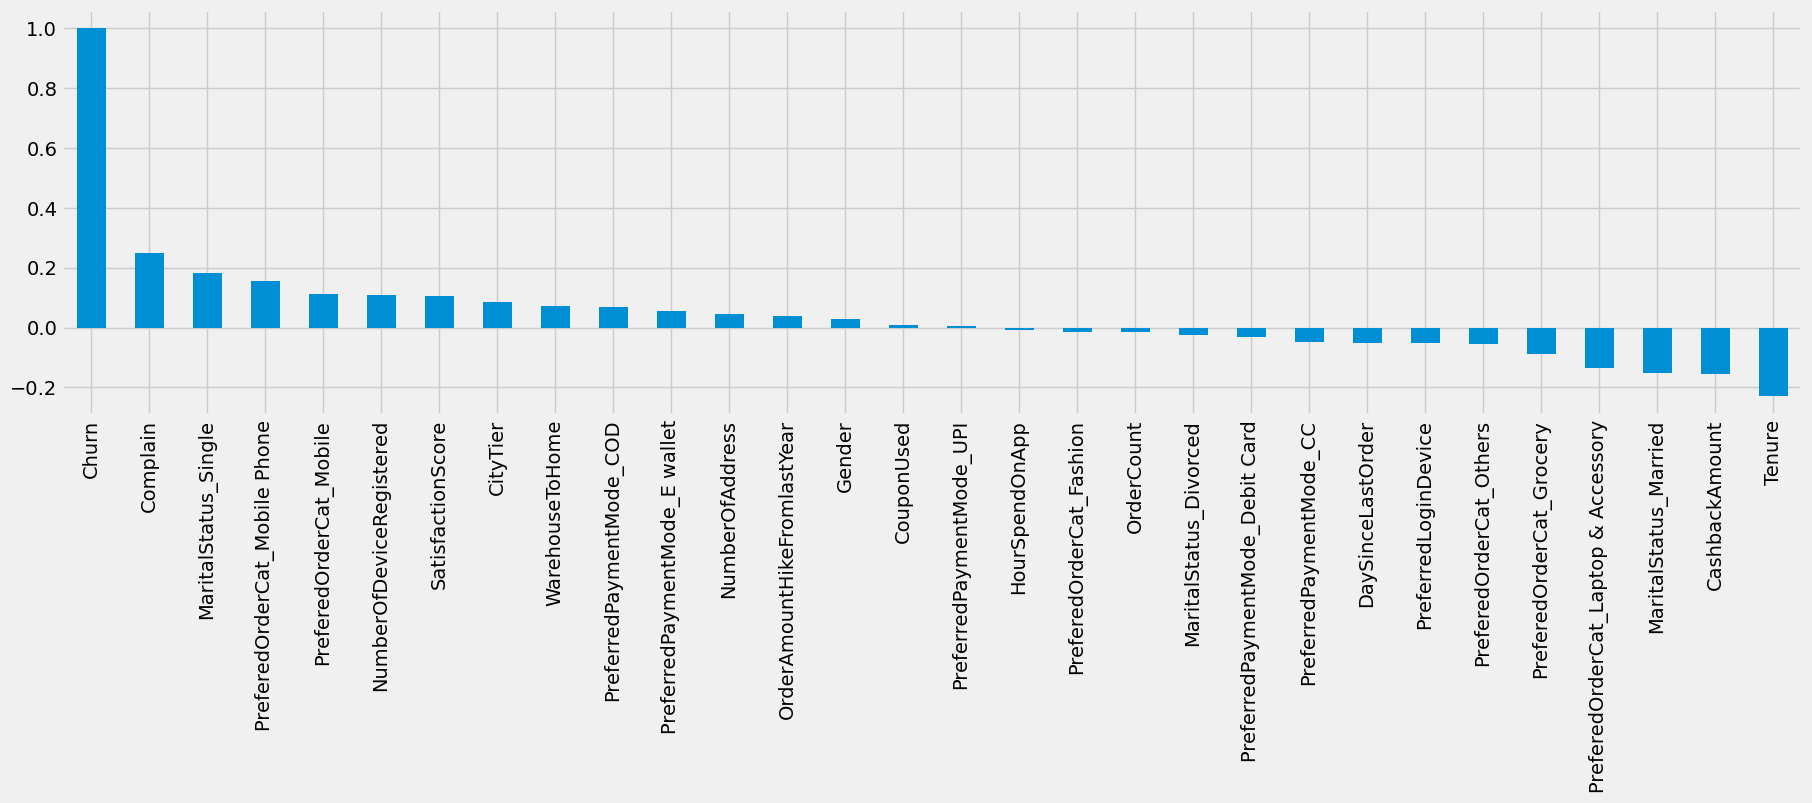

In [704]:
plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))
plt.show()

In [705]:
df.shape

(5630, 30)

### Train-Test-Split

In [706]:
from sklearn.model_selection import train_test_split

X1 = df.drop('Churn', axis=1)
X = X1.values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Evaluation Metrics

1. Confusion matrix: Shows a grid of true and false predictions compared to the actual values
2. Accuracy score: Shows the overall accuracy of the model for training set and test set
3. ROC Curve: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)
4. AUC (for ROC): Measures the overall separability between classes of the model related to the ROC curve
5. Precision-Recall-Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance
6. F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.
7. AUC (for PRC): Measures the overall separability between classes of the model related to the Precision-Recall curve

In [707]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [708]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name}-Confusion Matrix')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name}-Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [709]:
# Define a function that plots the ROC curve and the AUC score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [710]:
# Define a function that plots the precision-recall-curve and the F1 score and AUC score

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall-Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

### Model Selection, Training, Prediction and Assessment
1. Decision Tree - fast, simple and good for visualization
2. XGBoost- Accurate model, ensemble model, squencial learning